In [20]:
from keras.applications.xception import Xception
from keras.layers import Flatten, Add, GlobalAveragePooling2D
from keras import layers
from keras.layers import Dense
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.25)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Real_And_Synthetic',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='binary')

print(training_set[0][0].shape)
print(training_set[0][1].shape)

val_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Real_And_Synthetic',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='binary',
                                            subset='validation')

Found 161 images belonging to 2 classes.
(32, 224, 224, 3)
(32,)
Found 0 images belonging to 2 classes.


In [24]:
xcep = Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Convert ti sequential
x = xcep.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(xcep.input, predictions)

#for layer in xcep.layers:
#  model.add(layer)

#model.summary()
#model.layers.pop()

for layer in xcep.layers:
    layer.trainable = False

#model.add(Flatten())
#model.add(Dense(units = 128, activation = 'relu'))
#model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history1 = model.fit_generator(training_set,
                    steps_per_epoch=4,
                    epochs=60,
                    validation_data=val_set,
                    validation_steps=4)

for layer in xcep.layers:
    layer.trainable = True

history2 = model.fit_generator(training_set,
                    steps_per_epoch=4,
                    epochs=20,
                    validation_data=val_set,
                    validation_steps=4)


model.save('/content/drive/MyDrive/GAN/Xception')
clssf = model.to_json()
with open("/content/drive/MyDrive/GAN/Xception/60_20Ep.json", "w") as json_file:
    json_file.write(clssf)
model.save_weights("/content/drive/MyDrive/GAN/128/60_20Ep.h5")


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_15[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/60
4/4 [==============================] - 19s 4s/step - loss: 0.6300 - accuracy: 0.7641
Epoch 2/60
4/4 [==============================] - 17s 4s/step - loss: 0.5254 - accuracy: 0.8802
Epoch 3/60
4/4 [==============================] - 16s 4s/step - loss: 0.4598 - accuracy: 0.9253
Epoch 4/60
4/4 [==============================] - 17s 4s/step - loss: 0.3829 - accuracy: 0.9473
Epoch 5/60
4/4 [==============================] - 17s 4s/step - loss: 0.3465 - accuracy: 0.9626
Epoch 6/60
4/4 [==============================] - 17s 4s/step - loss: 0.3077 - accuracy: 0.9928
Epoch 7/60
4/4 [==============================] - 16s 5s/step - loss: 0.2683 - accuracy: 0.9959
Epoch 8/60
4/4 [==============================] - 16s 4s/step - loss: 0.2342 - accuracy: 1.0000
Epoch 9/60
4/4 [==============================] - 16s 5s/step - loss: 0.1944 - accuracy: 0.9959
Epoch 10/60
4/4 [==============================] - 23s 6s/step - loss: 0.2204 - accuracy: 0.9854
Epoch 11/60
4/4 [======================

NameError: ignored

dict_keys(['loss', 'accuracy'])


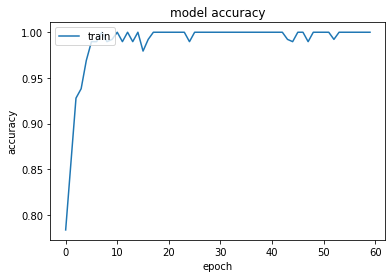

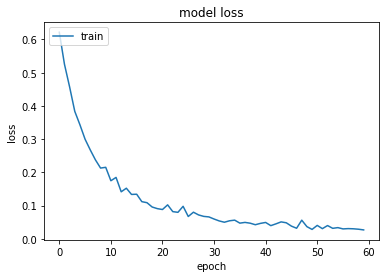

dict_keys(['loss', 'accuracy'])


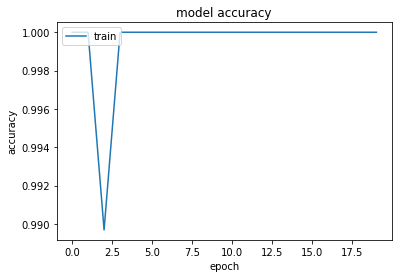

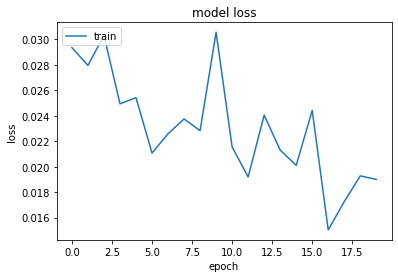

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

histories = [history1, history2]

for history in histories:
  print(history.history.keys())
  #  "Accuracy"
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # "Loss"
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()